In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns
from numpy import linalg as LA

In [ ]:
from google.colab import files
uploaded = files.upload()   

Saving DBMS-Performance-Monitor-Log.xls to DBMS-Performance-Monitor-Log.xls


In [ ]:
file_read = pd.read_excel('DBMS-Performance-Monitor-Log.xls')


In [ ]:
df=file_read[['CPU','Disk 1','Disk 2']]

In [ ]:
df.describe()

,CPU,Disk 1,Disk 2
count,200.000000,200.000000,200.00000
mean,238.204115,51.375000,44.84500
std,165.862655,26.994777,26.42142
min,23.596747,5.000000,7.00000
25%,104.439406,33.000000,26.25000
50%,151.624667,63.000000,39.00000
75%,418.052165,72.000000,68.00000
max,507.450031,85.000000,92.00000


In [ ]:
df.sum()

CPU       47640.823081
Disk 1    10275.000000
Disk 2     8969.000000
dtype: float64

In [ ]:
df.min()

CPU       23.596747
Disk 1     5.000000
Disk 2     7.000000
dtype: float64

In [ ]:
#variancia
df.var()

CPU       27510.420484
Disk 1      728.717965
Disk 2      698.091432
dtype: float64

In [ ]:
#coeficiente de variação
df.std()/df.mean()

CPU       0.696305
Disk 1    0.525446
Disk 2    0.589172
dtype: float64

Text(0.5, 1.0, 'Histograma CPU')

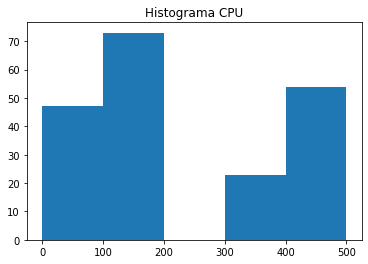

In [ ]:
plt.hist(df['CPU'],bins=[0,100,200,300,400,500])
plt.title('Histograma CPU')

Text(0.5, 1.0, 'Histograma Disk 1')

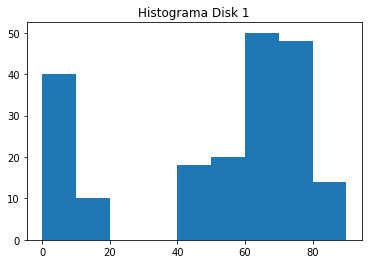

In [ ]:
plt.hist(df['Disk 1'],bins=[0,10,20,30,40,50,60,70,80,90])
plt.title('Histograma Disk 1')

Text(0.5, 1.0, 'Histograma Disk 2')

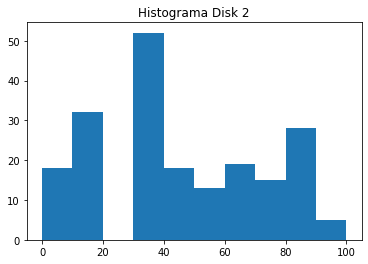

In [ ]:
plt.hist(df['Disk 2'],bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.title('Histograma Disk 2')

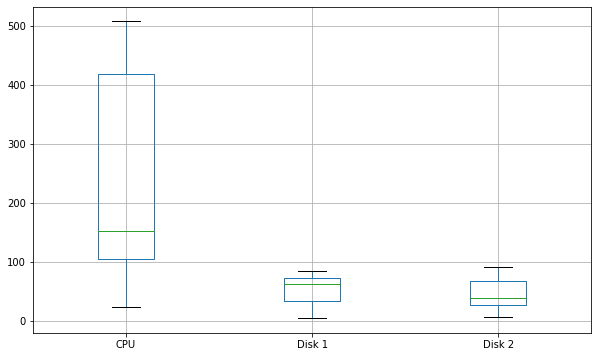

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot(column=['CPU','Disk 1', 'Disk 2'])

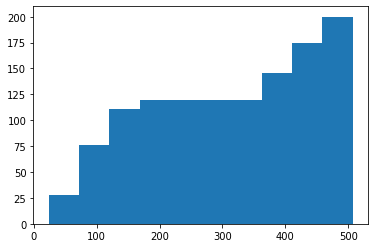

In [ ]:
plt.hist(df['CPU'],cumulative=True)
plt.show()

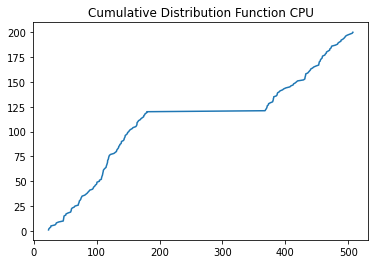

In [ ]:
cdf = df['CPU'].value_counts().sort_index().cumsum()
plt.title('Cumulative Distribution Function CPU')
cdf.plot()

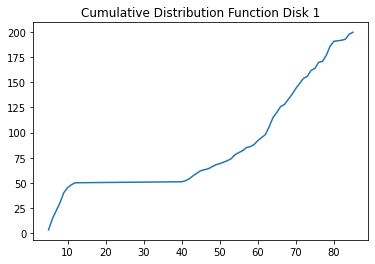

In [ ]:
cdf = df['Disk 1'].value_counts().sort_index().cumsum()
plt.title('Cumulative Distribution Function Disk 1')
cdf.plot()

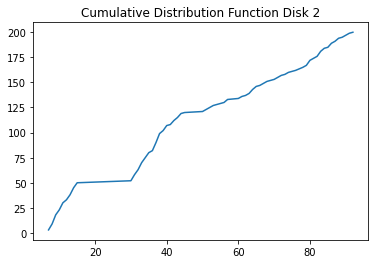

In [ ]:
cdf = df['Disk 2'].value_counts().sort_index().cumsum()
plt.title('Cumulative Distribution Function Disk 2')
cdf.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


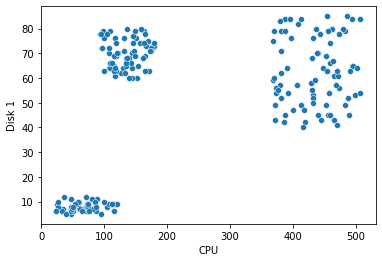

In [ ]:
sns.scatterplot('CPU', 'Disk 1', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


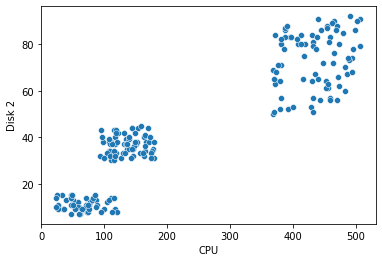

In [ ]:
sns.scatterplot('CPU', 'Disk 2', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


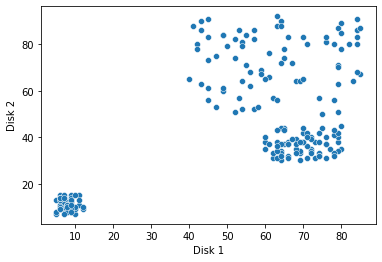

In [ ]:
sns.scatterplot('Disk 1', 'Disk 2', data=df)

In [ ]:
normalized_data=(df-df.mean())/df.std()

In [ ]:
normalized_data.describe()

,CPU,Disk 1,Disk 2
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,2.248202e-16,-1.088019e-16,-4.329870e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.293886e+00,-1.717925e+00,-1.432361e+00
25%,-8.064788e-01,-6.806872e-01,-7.037850e-01
50%,-5.219948e-01,4.306389e-01,-2.212220e-01
75%,1.084319e+00,7.640367e-01,8.763723e-01
max,1.623306e+00,1.245611e+00,1.784726e+00


In [ ]:
normalized_data.sum()

CPU       4.496403e-14
Disk 1   -2.176037e-14
Disk 2   -8.659740e-15
dtype: float64

In [ ]:
normalized_data.std()

CPU       1.0
Disk 1    1.0
Disk 2    1.0
dtype: float64

In [ ]:
correlation = normalized_data.corr()
correlation
#correlation.style.background_gradient(cmap='coolwarm')

,CPU,Disk 1,Disk 2
CPU,1.000000,0.465376,0.916320
Disk 1,0.465376,1.000000,0.625876
Disk 2,0.916320,0.625876,1.000000


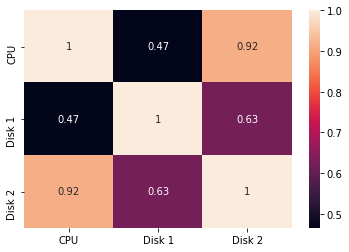

In [ ]:
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns,
        annot=True)

In [ ]:
eigenvalues, eigenvectors = LA.eig(correlation)

In [ ]:
eigenvalues

array([2.35694981, 0.06277021, 0.58027998])

In [ ]:
eigenvectors

array([[-0.59635627, -0.64024793,  0.48419188],
       [-0.49573   , -0.18067576, -0.84947516],
       [-0.63135645,  0.74661828,  0.20964299]])

In [ ]:
principal_factor = np.matmul(normalized_data,eigenvectors)
principal_factor

,CPU,Disk 1,Disk 2
0,2.071129,-0.260756,0.694711
1,2.296409,-0.044941,0.604559
2,2.400606,0.066925,0.519959
3,2.062447,-0.121362,0.713738
4,2.084350,-0.300474,0.695443
...,...,...,...
195,-0.041871,-0.119349,-0.936820
196,0.416142,0.028321,-0.624995
197,0.312750,0.186882,-0.598382
198,0.246047,0.057713,-0.880850


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


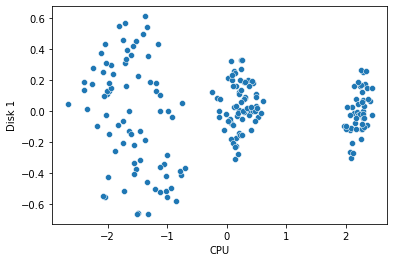

In [ ]:
sns.scatterplot('CPU', 'Disk 1', data=principal_factor)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


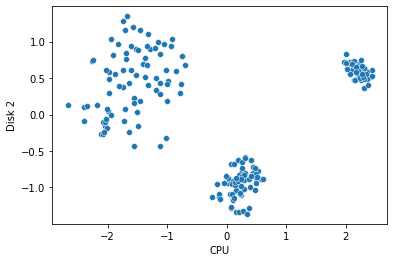

In [ ]:
sns.scatterplot('CPU', 'Disk 2', data=principal_factor)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


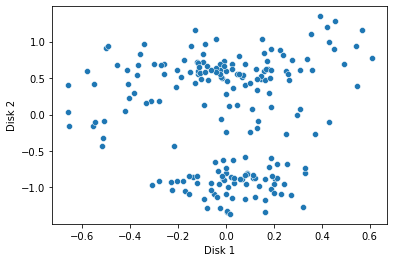

In [ ]:
sns.scatterplot('Disk 1', 'Disk 2', data=principal_factor)

In [ ]:
principal_factor.mean()

CPU      -1.164346e-16
Disk 1   -5.051515e-17
Disk 2    3.441691e-17
dtype: float64

In [ ]:
principal_factor.std()

CPU       1.535236
Disk 1    0.250540
Disk 2    0.761761
dtype: float64

In [ ]:
sum_pf = principal_factor.sum()
sum_pf

CPU      -2.328693e-14
Disk 1   -1.010303e-14
Disk 2    6.883383e-15
dtype: float64

In [ ]:
sum_square_pf = (principal_factor**2).sum()
sum_square_pf

CPU       469.033012
Disk 1     12.491271
Disk 2    115.475716
dtype: float64

In [ ]:
sum_total = sum_square_pf.sum()
sum_total

597.0

In [ ]:
cpu_impact = sum_square_pf['CPU']/sum_total
cpu_impact

0.7856499368828583

In [ ]:
disk_1_impact = sum_square_pf['Disk 1']/sum_total
disk_1_impact

0.020923402712445634

In [ ]:
disk_2_impact = sum_square_pf['Disk 2']/sum_total
disk_2_impact

0.19342666040469614

In [ ]:
def applyPercentage(l):
	return list( map(lambda x: x * 100, l) )
 
percentages = applyPercentage([cpu_impact,disk_1_impact,disk_2_impact])
percentages

[78.56499368828584, 2.0923402712445633, 19.342666040469613]

([<matplotlib.patches.Wedge at 0x7f2b68b008d0>,
 [Text(-0.7483773567607921, -0.9380465510238446, 'CPU'),
  Text(1.0541537553058289, 0.3142608155252875, 'Disk 1'),
  Text(0.6280496059808988, 0.9030801140691993, 'Disk 2')],
 [Text(-0.436553458110462, -0.5471938214305759, '78.6%'),
  Text(0.574992957439543, 0.17141499028652044, '2.1%'),
  Text(0.3425725123532175, 0.4925891531286541, '19.3%')])

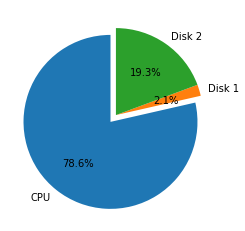

In [ ]:
explode = (0.1, 0, 0)
plt.pie(percentages,labels=['CPU', 'Disk 1', 'Disk 2'],explode=explode,autopct='%1.1f%%', startangle=90)

In [ ]:
from sklearn.decomposition import PCA

Resultado do PCA : 

	CPU : 0.976705
	Disk 1 : 0.020862
	Disk 2 : 0.002433


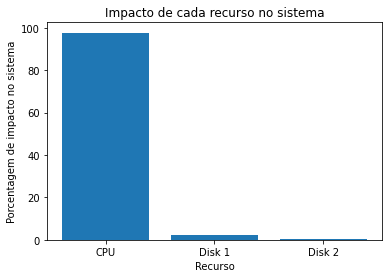

<Figure size 432x288 with 0 Axes>

In [ ]:
pca = PCA(n_components=3)

pca.fit(df)
percentages = pca.explained_variance_ratio_
print('Resultado do PCA : \n\n\tCPU : %f\n\tDisk 1 : %f\n\tDisk 2 : %f' % (percentages[0],percentages[1],percentages[2]))

plt.clf()
plt.bar(['CPU', 'Disk 1', 'Disk 2'], applyPercentage(percentages) )
plt.xlabel('Recurso')
plt.ylabel('Porcentagem de impacto no sistema')
plt.title('Impacto de cada recurso no sistema')
plt.savefig('resources-impact-skleann.png', format='png')
plt.show()
plt.clf()

## Análise para Clusterização


In [ ]:
df2 = file_read[['CPU','Disk 2']]

In [ ]:
df2.head()

,CPU,Disk 2
0,116.824440,9
1,64.383041,9
2,35.402999,9
3,104.408537,12
4,119.793137,8


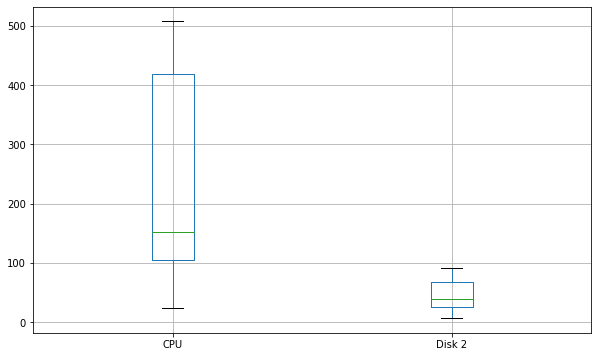

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot(column=['CPU','Disk 2'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
def k_intra_distance(data, cx, cy, i_centroid, cluster_labels):
  distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x,y) in data[cluster_labels == i_centroid]]
  return np.mean(distances)


In [ ]:
def k_inter_distance(centroids):
  total_distances = []
  for (cx, cy) in centroids:
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x,y) in centroids]
    total_distances.extend(distances)
  total_distances_filter = list(filter(lambda a: a!=0, total_distances)) #remove os 0's
  return list(dict.fromkeys(total_distances_filter)) #remove as duplicatas


In [ ]:
scaler = StandardScaler(with_mean=False)
df3 = scaler.fit_transform(df2)

In [ ]:
df4 = scaler.inverse_transform(df3)
df4[:10]

array([[116.82444025,   9.        ],
       [ 64.3830412 ,   9.        ],
       [ 35.402999  ,   9.        ],
       [104.40853658,  12.        ],
       [119.79313725,   8.        ],
       [ 47.95630764,   7.        ],
       [ 72.45272832,   8.        ],
       [ 33.8001573 ,  15.        ],
       [ 70.90019077,  14.        ],
       [ 86.32890285,  13.        ]])

In [ ]:
df3[:10]

array([[0.70611194, 0.3414875 ],
       [0.38914489, 0.3414875 ],
       [0.21398331, 0.3414875 ],
       [0.63106756, 0.45531667],
       [0.72405538, 0.30354445],
       [0.28985819, 0.26560139],
       [0.43791981, 0.30354445],
       [0.20429539, 0.56914584],
       [0.42853594, 0.53120278],
       [0.52179038, 0.49325973]])

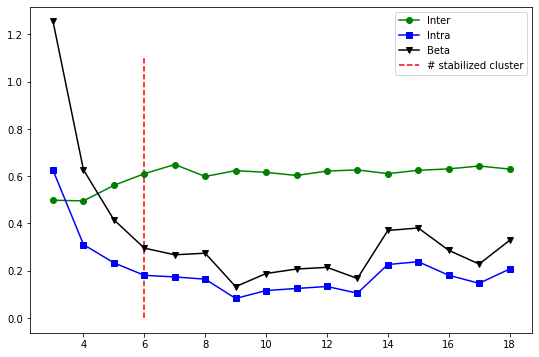

In [ ]:
inter_distances = []
intra_distances = []
beta_distances = []
total_clusters = np.arange(3,19)

for i in range(3,19):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  clusters = kmeans.fit_predict(df3)

  centroids = kmeans.cluster_centers_ 

  mean_inter_distance = k_inter_distance(centroids)
  df_inter_distance = pd.DataFrame(mean_inter_distance, columns=['distance'])
  cv_inter = df_inter_distance['distance'].std()/df_inter_distance['distance'].mean()
  inter_distances.append(cv_inter)

  mean_intra_distance = []
  for i, (c_x, c_y) in enumerate(centroids):
    mean_distance = k_intra_distance(df3, c_x, c_y, i, clusters)
    mean_intra_distance.append(mean_distance)
  df_intra_distance = pd.DataFrame(mean_intra_distance, columns=['distance'])
  cv_intra = df_intra_distance['distance'].std()/df_intra_distance['distance'].mean()
  intra_distances.append(cv_intra)

  cv_beta = cv_intra/cv_inter
  beta_distances.append(cv_beta)

plt.figure(figsize=(9,6))
plt.plot(total_clusters, inter_distances, marker='o', label='Inter', color='green')
plt.plot(total_clusters, intra_distances, marker='s', label='Intra', color='blue')
plt.plot(total_clusters, beta_distances, marker='v', label='Beta', color='black')
plt.vlines(x=6, ymin=0, ymax=1.1, colors='red', linestyles='dashed', label='# stabilized cluster')
plt.legend()


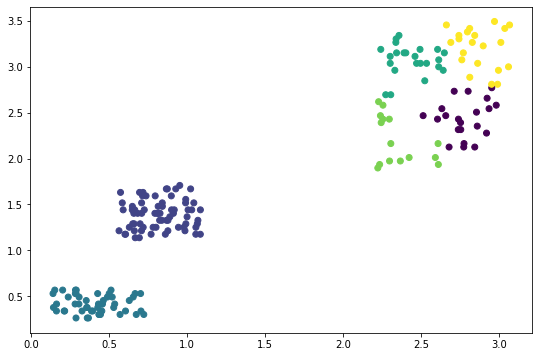

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++')
clusters = kmeans.fit_predict(df3)
plt.figure(figsize=(9,6))

plt.scatter(df3[:,0], df3[:,1], c=clusters)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[2.78150518, 2.43016239],
       [0.82290432, 1.39196811],
       [0.40800896, 0.41813248],
       [2.43651767, 3.07173783],
       [2.3457839 , 2.19816771],
       [2.8718721 , 3.20528482]])

Text(0, 0.5, 'Disk 2')

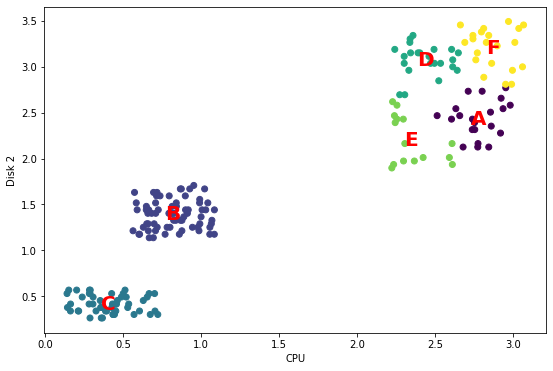

In [ ]:
plt.figure(figsize=(9,6))
groups = {'A': (2.78150518, 2.43016239),
         'B': (0.82290432, 1.39196811),
         'C': (0.40800896, 0.41813248),
         'D': (2.43651767, 3.07173783),
         'E': (2.3457839 , 2.19816771),
         'F': (2.8718721 , 3.20528482)}

for label,values in zip(groups.keys(),groups.values()):
  plt.annotate(label, 
               xy=(values[0],values[1]), 
               xytext=(values[0],values[1]), 
               size=20, 
               weight='bold', 
               color='red', 
               horizontalalignment='center',
               verticalalignment='center')
plt.scatter(df3[:,0], df3[:,1], c=clusters)
plt.xlabel('CPU')
plt.ylabel('Disk 2')

In [ ]:
np.bincount(clusters)

array([21, 70, 50, 23, 15, 21])

In [ ]:
for i in range(len(kmeans.cluster_centers_)):
  print(kmeans.cluster_centers_[i])
  print(sum(kmeans.labels_==i))
  print('\n')

[2.78150518 2.43016239]
21


[0.82290432 1.39196811]
70


[0.40800896 0.41813248]
50


[2.43651767 3.07173783]
23


[2.3457839  2.19816771]
15


[2.8718721  3.20528482]
21




In [ ]:
clusterA = df3[kmeans.labels_==0]
clusterB = df3[kmeans.labels_==1]
clusterC = df3[kmeans.labels_==2]
clusterD = df3[kmeans.labels_==3]
clusterE = df3[kmeans.labels_==4]
clusterF = df3[kmeans.labels_==5]

In [ ]:
df_clusterA = pd.DataFrame(clusterA, columns=['CPU', 'Disk 2'])
print(df_clusterA.describe())
print('\n')
print(df_clusterA.var())
print('\n')
print(df_clusterA.std()/df_clusterA.mean())
print('\n')
print(df_clusterA.sum())
print('\n')
print(df_clusterA.max()-df_clusterA.min())

             CPU     Disk 2
count  21.000000  21.000000
mean    2.781505   2.430162
std     0.124216   0.201662
min     2.513399   2.124811
25%     2.712475   2.314526
50%     2.773597   2.428356
75%     2.860080   2.542185
max     2.981641   2.769843


CPU       0.015430
Disk 2    0.040667
dtype: float64


CPU       0.044658
Disk 2    0.082983
dtype: float64


CPU       58.411609
Disk 2    51.033410
dtype: float64


CPU       0.468242
Disk 2    0.645032
dtype: float64


In [ ]:
df_clusterB = pd.DataFrame(clusterB, columns=['CPU', 'Disk 2'])
print(df_clusterB.describe())
print('\n')
print(df_clusterB.var())
print('\n')
print(df_clusterB.std()/df_clusterB.mean())
print('\n')
print(df_clusterB.sum())
print('\n')
print(df_clusterB.max()-df_clusterB.min())

             CPU     Disk 2
count  70.000000  70.000000
mean    0.822904   1.391968
std     0.149584   0.155647
min     0.565351   1.138292
25%     0.697755   1.252121
50%     0.821265   1.403893
75%     0.941642   1.508236
max     1.086655   1.707438


CPU       0.022375
Disk 2    0.024226
dtype: float64


CPU       0.181776
Disk 2    0.111818
dtype: float64


CPU       57.603303
Disk 2    97.437768
dtype: float64


CPU       0.521304
Disk 2    0.569146
dtype: float64


In [ ]:
df_clusterC = pd.DataFrame(clusterC, columns=['CPU', 'Disk 2'])
print(df_clusterC.describe())
print('\n')
print(df_clusterC.var())
print('\n')
print(df_clusterC.std()/df_clusterC.mean())
print('\n')
print(df_clusterC.sum())
print('\n')
print(df_clusterC.max()-df_clusterC.min())

             CPU     Disk 2
count  50.000000  50.000000
mean    0.408009   0.418132
std     0.161014   0.095279
min     0.142624   0.265601
25%     0.289945   0.341488
50%     0.412568   0.417374
75%     0.511304   0.493260
max     0.724055   0.569146


CPU       0.025926
Disk 2    0.009078
dtype: float64


CPU       0.394634
Disk 2    0.227869
dtype: float64


CPU       20.400448
Disk 2    20.906624
dtype: float64


CPU       0.581432
Disk 2    0.303544
dtype: float64


In [ ]:
df_clusterD = pd.DataFrame(clusterD, columns=['CPU', 'Disk 2'])
print(df_clusterD.describe())
print('\n')
print(df_clusterD.var())
print('\n')
print(df_clusterD.std()/df_clusterD.mean())
print('\n')
print(df_clusterD.sum())
print('\n')
print(df_clusterD.max()-df_clusterD.min())

             CPU     Disk 2
count  23.000000  23.000000
mean    2.436518   3.071738
std     0.129637   0.165183
min     2.242111   2.693957
25%     2.335483   3.016473
50%     2.402787   3.111331
75%     2.529630   3.168245
max     2.649273   3.338989


CPU       0.016806
Disk 2    0.027286
dtype: float64


CPU       0.053206
Disk 2    0.053775
dtype: float64


CPU       56.039906
Disk 2    70.649970
dtype: float64


CPU       0.407161
Disk 2    0.645032
dtype: float64


In [ ]:
df_clusterE = pd.DataFrame(clusterE, columns=['CPU', 'Disk 2'])
print(df_clusterE.describe())
print('\n')
print(df_clusterE.var())
print('\n')
print(df_clusterE.std()/df_clusterE.mean())
print('\n')
print(df_clusterE.sum())
print('\n')
print(df_clusterE.max()-df_clusterE.min())

             CPU     Disk 2
count  15.000000  15.000000
mean    2.345784   2.198168
std     0.144333   0.259121
min     2.223105   1.897153
25%     2.242323   1.973039
50%     2.296734   2.162754
75%     2.395571   2.428356
max     2.610895   2.618071


CPU       0.020832
Disk 2    0.067144
dtype: float64


CPU       0.061529
Disk 2    0.117880
dtype: float64


CPU       35.186758
Disk 2    32.972516
dtype: float64


CPU       0.387790
Disk 2    0.720918
dtype: float64


In [ ]:
df_clusterF = pd.DataFrame(clusterF, columns=['CPU', 'Disk 2'])
print(df_clusterF.describe())
print('\n')
print(df_clusterF.var())
print('\n')
print(df_clusterF.std()/df_clusterF.mean())
print('\n')
print(df_clusterF.sum())
print('\n')
print(df_clusterF.max()-df_clusterF.min())

             CPU     Disk 2
count  21.000000  21.000000
mean    2.871872   3.205285
std     0.125397   0.217840
min     2.662389   2.807786
25%     2.770865   3.035444
50%     2.843955   3.263103
75%     2.990349   3.376932
max     3.067137   3.490761


CPU       0.015724
Disk 2    0.047454
dtype: float64


CPU       0.043664
Disk 2    0.067963
dtype: float64


CPU       60.309314
Disk 2    67.310981
dtype: float64


CPU       0.404748
Disk 2    0.682975
dtype: float64
